## Assignment 4: Exploring Yelp Reviews

**NOTE: THIS ASSIGNMENT IS OPTIONAL**

You must complete **one** out of homeworks #4, #5, and #6.

**Due date: Monday, 11/1 by the end of day**

In this assignment, we'll explore restaurant review data available through the [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge). The dataset includes Yelp data for user reviews and business information for 10 metropolitan areas. The `data` directory in this repository includes data files for reviews and restaurants in 3 of these cities: Cleveland, Pittsburgh, and Charlotte. These cities were chosen since the data is not too large — the data for the other cities can be downloaded from the Yelp download page. For this assignment, you are welcome to analyze data any of the three cities. 

This assignment is broken into two parts:

#### Part 1: testing how well sentiment analysis works.

Because Yelp reviews include the number of stars given by the user, the Yelp data set provides a unique opportunity to test how well our sentiment analysis works by comparing the number of stars to the polarity of reviews.

#### Part 2: analyzing correlations between restaurant reviews and census data

We'll explore geographic trends in the restaurant reviews, comparing our sentiment analysis results with user stars geographically. We'll also overlay review stars on maps of household income (using census data).
    
#### Background readings
- [Does sentiment analysis work?](http://varianceexplained.org/r/yelp-sentiment/)
- [The Geography of Taste: Using Yelp to Study Urban Culture](https://www.mdpi.com/2220-9964/7/9/376/pdf/1)

## 1. Does Sentiment Analysis Work?

In this part, we'll load the data, perform a sentiment analysis, and explore the results.

### 1.1 Load review data

You can choose data from Cleveland, Charlotte, or Pittsburgh. The data is stored as a JSON file and you can use `pandas.read_json` to load it. 

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [1]:
import pandas as pd
revw = pd.read_json("data/reviews_charlotte.json", orient='records',lines=True)

In [3]:
revw.head()

,business_id,review_id,stars,text
0,FBSWwaE6gR7KAOyG1QhakQ,-QxhbVQrcnVWGiua9r44JA,5,Such a unique place & a great find. Our waitre...
1,FBSWwaE6gR7KAOyG1QhakQ,HYBzY7zN_YBHtQu6qkD3Ng,5,Easily entering my top 3 restaurants in Charlo...
2,ZCsvwa_dsqNB8d8tYHPdjw,ASZha3MiQJghtt3n5OGIsA,4,This random hole in the wall is located in the...
3,CGUK3cd2gxp2q3KPY19Oog,LrO2MkIWIjAoOeS5WImnrQ,5,Yum!! Had the kale grits and would definitely ...
4,xHZmM-kGXqOfmQNTm0T05g,m14cjbICuRRASAitrh_YXA,3,Overall the food is really good. We had brusch...


### 1.2 Format the review text

The first step is to split the review text into its individual words and make all of the words lower-cased.

Add a new column, called 'formatted_text', which each entry is a list of the lower-cased words in a review.

In [4]:
revw['text']

0         Such a unique place & a great find. Our waitre...
1         Easily entering my top 3 restaurants in Charlo...
2         This random hole in the wall is located in the...
3         Yum!! Had the kale grits and would definitely ...
4         Overall the food is really good. We had brusch...
                                ...                        
208496    I wish i could give this place, management, an...
208497    I'd recommend a road trip to Lexington instead...
208498    Wonderful spot (the patio) and OH SO EXCELLENT...
208499    So glad we stopped at Londa's\nThey had a wide...
208500    The atmosphere is so nice in this restaurant. ...
Name: text, Length: 208501, dtype: object

In [18]:
# split the pundtuations(e.g. commas, question marks..) and words
import string

def remove_punctuation(sentence):
    """
    Remove punctuation from the input sentence.
    """
    translator = str.maketrans('', '', string.punctuation)
    return sentence.translate(translator)

In [19]:
formatted_text = [remove_punctuation(i) for i in revw['text']]

In [20]:
formatted_text = [ a.lower().split() for a in formatted_text]

In [162]:
print(formatted_text[:2])

[['unique', 'place', 'great', 'find', 'waitress', 'funny', 'knowledgable', 'fantastic', 'job', 'food', 'amazing', 'definitely', 'return', 'recommend', 'restaurant', 'couples'], ['easily', 'entering', 'top', '3', 'restaurants', 'charlotte', 'one', 'visit', 'pork', 'belly', 'unreal', 'amazing', 'prime', 'ny', 'strip', 'bourbon', 'butter', 'jam', 'phenomenal']]


### 1.3 Review stop words

Use the `nltk` library to remove any stop words from the list of words in each review. 

Overwrite the 'formatted_text' column to contain a list of lower-cased words in each review, with no stop words. 

In [22]:
# stop words
import nltk
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
stop_words = list(set(nltk.corpus.stopwords.words('english')))

In [25]:
formatted_text = [[a for a in sentence if a not in stop_words] for sentence in formatted_text]
formatted_text

[['unique',
  'place',
  'great',
  'find',
  'waitress',
  'funny',
  'knowledgable',
  'fantastic',
  'job',
  'food',
  'amazing',
  'definitely',
  'return',
  'recommend',
  'restaurant',
  'couples'],
 ['easily',
  'entering',
  'top',
  '3',
  'restaurants',
  'charlotte',
  'one',
  'visit',
  'pork',
  'belly',
  'unreal',
  'amazing',
  'prime',
  'ny',
  'strip',
  'bourbon',
  'butter',
  'jam',
  'phenomenal'],
 ['random',
  'hole',
  'wall',
  'located',
  'park',
  'rd',
  'shopping',
  'center',
  'never',
  'heard',
  'fateful',
  'st',
  'patricks',
  'day',
  'another',
  'beer',
  'order',
  'making',
  'way',
  'enjoying',
  'patio',
  'decided',
  'food',
  'next',
  'venture',
  'second',
  'alcohol',
  'visit',
  'excited',
  'taste',
  'vegetarian',
  'options',
  'grilled',
  'cheese',
  'spicy',
  'asparagus',
  'portobello',
  'let',
  'tell',
  'yougrilled',
  'cheese',
  'amazing',
  'add',
  'interesting',
  'touches',
  'becomes',
  'addicting',
  'happy

### 1.4 Calculate polarity and subjectivity

Using the formatted text column, create a list of `textblob.TextBlob()` objects and then extract the `subjectivity` and `polarity`.

Add two new columns to the review DataFrame: `polarity` and `subjectivity`.

**Note: the polarity/subjectivity calculation can take several minutes to run**

In [26]:
import textblob

In [27]:
blobs = [textblob.TextBlob(t) for t in revw['text']]

In [96]:
data = {}
data['stars'] = revw['stars']
data['polarity'] = [blob.sentiment.polarity for blob in blobs]
data['subjectivity'] = [blob.sentiment.subjectivity for blob in blobs]
data['text'] = revw['text']
data['formatted_text'] = [a for a in formatted_text].copy()
data['review_id'] = revw['review_id']
data = pd.DataFrame(data)

In [97]:
data.head()

,stars,polarity,subjectivity,text,formatted_text,review_id
0,5,0.283594,0.740625,Such a unique place & a great find. Our waitre...,"[unique, place, great, find, waitress, funny, ...",-QxhbVQrcnVWGiua9r44JA
1,5,0.609896,0.683333,Easily entering my top 3 restaurants in Charlo...,"[easily, entering, top, 3, restaurants, charlo...",HYBzY7zN_YBHtQu6qkD3Ng
2,4,0.285204,0.470408,This random hole in the wall is located in the...,"[random, hole, wall, located, park, rd, shoppi...",ASZha3MiQJghtt3n5OGIsA
3,5,0.418750,0.750000,Yum!! Had the kale grits and would definitely ...,"[yum, kale, grits, would, definitely, menu, ch...",LrO2MkIWIjAoOeS5WImnrQ
4,3,0.242889,0.489704,Overall the food is really good. We had brusch...,"[overall, food, really, good, bruschetta, seem...",m14cjbICuRRASAitrh_YXA


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208501 entries, 0 to 208500
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   stars           208501 non-null  int64  
 1   polarity        208501 non-null  float64
 2   subjectivity    208501 non-null  float64
 3   text            208501 non-null  object 
 4   formatted_text  208501 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.0+ MB


### 1.5 Comparing the sentiment analysis to number of stars 

Use `seaborn` to make two box plots, one showing the polarity vs number of user stars and one showing the subjectivity vs the number of user stars.

In [47]:
import seaborn as sns

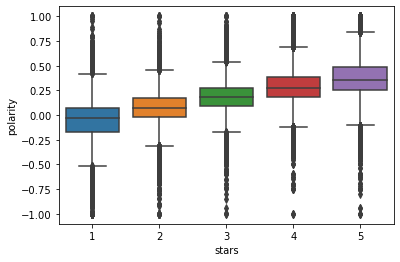

In [70]:
ax = sns.boxplot(x='stars', y='polarity',data = data)

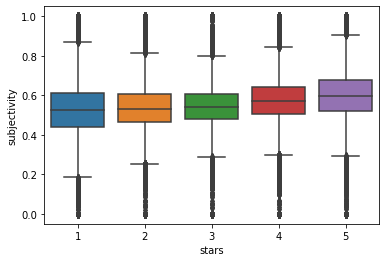

In [71]:
ax = sns.boxplot(x='stars',y='subjectivity',data = data)

**Question:** What do your charts indicate for the effectiveness of our sentiment analysis?

- The chart of polarity and number of user stars shows that on average the higher the star is, the more positive the polarity is. The polarity fluctuates more in extreme stars(e.g. 1 and 5) and contencrates most in stars number of 3.
- The chart of subjectivity and number of user stars shows that on average the subjectivity is slightly higher than 0.5 in all stars, which means the average of reviews are roughly neutral. The subjectivity fluctuates more in extreme stars(e.g. 1 and 5) and contencrates most in stars number of 3.


### 1.6 The importance of individual words

In this part, we'll explore the importance and frequency of individual words in Yelp reviews.

We will identify the most common reviews and then plot the average polarity vs the user stars for the reviews where those words occur. 

#### 1.6.1 Select a random sample of the review data

Select 1,000 random rows from the DataFrame holding the review data. Use the `.sample()` function to perform the selection.

In [147]:
data_sample = data.sample(1000)

In [148]:
data_sample

,stars,polarity,subjectivity,text,formatted_text,review_id
48503,5,0.423438,0.571875,Yummy yummy yummy!! All of it! Had the crab ca...,"[yummy, yummy, yummy, crab, cake, sandwhich, e...",2vrKHafJCO8Dl-xA9EKJAg
135890,5,0.188839,0.489286,Now that summer is almost over I honestly hope...,"[summer, almost, honestly, hope, vada, via, wi...",W9A0L-pWU1pOSE9VvBwLKQ
90680,5,0.540000,0.662778,I love this place!! Everything is so fresh and...,"[love, place, everything, fresh, everyone, nic...",ybc3pXN6UzzqPc6ZgmWVew
47146,5,0.259167,0.766667,Amazing service and great menu selection. The ...,"[amazing, service, great, menu, selection, roa...",1FxzM3OKwT1mK8SlYOrKuw
79439,5,0.207143,0.607143,The atmosphere was very welcoming and it was j...,"[atmosphere, welcoming, jammed, packed, sunday...",CG4Jj-6CKc2nDTiwSCQgOg
...,...,...,...,...,...,...
32072,3,0.215625,0.440104,Whats good about Tupelo Honey: Their Bar!\nI h...,"[whats, good, tupelo, honey, bar, great, exper...",EZDBjL86WcFWTqiT2_5wxw
18027,4,0.141447,0.534064,The MAJOR take away from my experience here is...,"[major, take, away, experience, warmth, staff,...",hQI_4xv5H1B1wRW7DtcH0A
205611,5,0.485705,0.594615,Great little pizza place. Service was good. Go...,"[great, little, pizza, place, service, good, g...",0O6zXIsZM3PPecJ2ZbUamg
27610,5,0.450000,0.687500,This is my most favorite restaurant in NoDa. A...,"[favorite, restaurant, noda, always, fun, atmo...",NzopNjUDAqCT3ymCQHDQlg


#### 1.6.2 Re-format the data

Pass the subset of review data from the previous part to the `reshape_data()` function defined below. Explore the result of this function, and in one or two sentences, explain the operation performed by `reshape_data()`. 

In [149]:
def reshape_data(review_subset):
    """
    Reshape the input dataframe of review data.
    """
    from pandas import Series, merge
    
    X = (review_subset['formatted_text']
         .apply(Series)
         .stack()
         .reset_index(level=1, drop=True)
         .to_frame('word'))
    
    
    R = review_subset[['polarity', 'stars', 'review_id']]
    
    return merge(R, X, left_index=True, right_index=True).reset_index(drop=True)

In [150]:
data_sample = reshape_data(data_sample)

**Question:** what is the operation performed by the `reshape_data()` function?

**Answer:**

The operation in reshape_data() function:
- X:
    1. transform every row of data_sample['formatted_text'] from list to Series
    2. stack the columns under each index
    3. cancel the sub index
    4. convert Series to DataFrame.
- R: slices of review_subset
- Combine X and R using the same index as join key

#### 1.6.3 Calculate the average number of stars and polarity for each word

Using the result from 1.6.2, group by the "word" column, and calculate the following three quantities:
1. the size of each group 
1. the average number of user stars for each word
1. the average polarity for each word

Combine these three results into a single DataFrame object.  

**Hint:** you can combine the three results using either the `pandas.concat()` or the `pandas.merge()` function.

In [183]:
size = data_sample.groupby('word').size().rename('size')
avg = data_sample.groupby('word').mean()

In [184]:
grouped = pd.merge(size,avg, left_index = True, right_index = True)

In [192]:
grouped = grouped.rename(columns={"polarity":"avg_polarity","stars":"avg_stars"})

In [194]:
grouped.head()

,size,avg_polarity,avg_stars
word,,,
025,1,0.171795,5.000000
05122018,1,-0.007209,1.000000
099,1,-0.113095,2.000000
1,38,0.155348,3.105263
10,48,0.166990,3.020833


#### 1.6.4 Select words the occur at least 50 times in reviews

Trim your DataFrame from the last section to only include words that occurred at least 50 times. Remember, when you grouped by the 'word' column, the `size()` function told you how many times each word occurred. 

In [199]:
grouped50 = grouped[size >= 50]

#### 1.6.5 Plot the average polarity vs user stars

Use `matplotlib` to make a scatter plot of the average user stars vs average polarity for the words in the data frame from the last section. This will involve two steps:

Loop over each row of the data frame from the last section and for each row:

1. Use `plt.scatter(x, y)` to plot a scatter plot, where x is polarity and y is stars. 
1. Use `plt.text(x, y, word)` to add the corresponding word to each scatter marker.

Using the data frame from section 1.4, add vertical and horizontal lines to your chart that shows the average number of user stars and the average polarity across all reviews in the data set. 

Make sure the figure is big enough so that you can make out some of the words, especially at low and high polarity values. You should be able to see a strong trend between polarity and user stars, and some of the most common words occurring in these reviews. 

In [197]:
import matplotlib.pyplot as plt

In [198]:
data.head()

,stars,polarity,subjectivity,text,formatted_text,review_id
0,5,0.283594,0.740625,Such a unique place & a great find. Our waitre...,"[unique, place, great, find, waitress, funny, ...",-QxhbVQrcnVWGiua9r44JA
1,5,0.609896,0.683333,Easily entering my top 3 restaurants in Charlo...,"[easily, entering, top, 3, restaurants, charlo...",HYBzY7zN_YBHtQu6qkD3Ng
2,4,0.285204,0.470408,This random hole in the wall is located in the...,"[random, hole, wall, located, park, rd, shoppi...",ASZha3MiQJghtt3n5OGIsA
3,5,0.418750,0.750000,Yum!! Had the kale grits and would definitely ...,"[yum, kale, grits, would, definitely, menu, ch...",LrO2MkIWIjAoOeS5WImnrQ
4,3,0.242889,0.489704,Overall the food is really good. We had brusch...,"[overall, food, really, good, bruschetta, seem...",m14cjbICuRRASAitrh_YXA


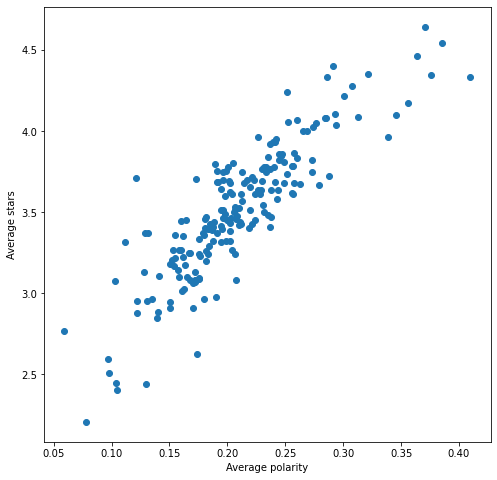

In [219]:
fig, ax = plt.subplots(figsize=(8, 8))

x = grouped50['avg_polarity']
y = grouped50['avg_stars']
#z = grouped50['word']

plt.scatter(x, y)

plt.xlabel("Average polarity")
plt.ylabel("Average stars")

#plt.text(x, y,z)
plt.show()

## 2. Correlating restaurant data and household income

In this part, we'll use the census API to download household income data and overlay restaurant locations.

### 2.1 Query the Census API

Use the `cenpy` package to download **median household income in the past 12 months** by census tract from the 2018 ACS 5-year data set for your county of interest.

You have two options to find the correct variable names:
- Search through: https://api.census.gov/data/2018/acs/acs5/variables.html
- Initialize an API connection and use the `.varslike()` function to search for the proper keywords 

At the end of this step, you should have a pandas DataFrame holding the income data for all census tracts within the county being analyzed.

**Hints**

The FIPS codes for the various state/counties are: 

- Pittsburgh
    - PA code: '42'
    - County code: '003' (Allegheny County)
- Cleveland
    - OH code: '39'
    - County code: '035' (Cuyahoga County)
- Charlotte
    - NC code: '37'
    - County code: '119' (Mecklenburg County)

In [221]:
import cenpy 

In [222]:
available = cenpy.explorer.available()
available.head()

,c_isMicrodata,c_isTimeseries,publisher,temporal,spatial,programCode,modified,keyword,contactPoint,distribution,...,c_isCube,c_isAggregate,c_valuesLink,c_groupsLink,c_examplesLink,c_tagsLink,c_variablesLink,c_geographyLink,c_dataset,vintage
ABSCB2017,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:007,2020-04-30 00:00:00.0,(),"{'fn': 'ASE Staff', 'hasEmail': 'mailto:erd.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,NaN,True,https://api.census.gov/data/2017/abscb/values....,https://api.census.gov/data/2017/abscb/groups....,https://api.census.gov/data/2017/abscb/example...,https://api.census.gov/data/2017/abscb/tags.json,https://api.census.gov/data/2017/abscb/variabl...,https://api.census.gov/data/2017/abscb/geograp...,"(abscb,)",2017.0
ABSCB2018,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:007,2020-10-26 00:00:00.0,(),"{'fn': 'ASE Staff', 'hasEmail': 'mailto:Erd.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,NaN,True,https://api.census.gov/data/2018/abscb/values....,https://api.census.gov/data/2018/abscb/groups....,https://api.census.gov/data/2018/abscb/example...,https://api.census.gov/data/2018/abscb/tags.json,https://api.census.gov/data/2018/abscb/variabl...,https://api.census.gov/data/2018/abscb/geograp...,"(abscb,)",2018.0
ABSCB2019,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:007,2021-08-17 00:00:00.0,(),"{'fn': 'ASE Staff', 'hasEmail': 'mailto:ERD.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,NaN,True,https://api.census.gov/data/2019/abscb/values....,https://api.census.gov/data/2019/abscb/groups....,https://api.census.gov/data/2019/abscb/example...,https://api.census.gov/data/2019/abscb/tags.json,https://api.census.gov/data/2019/abscb/variabl...,https://api.census.gov/data/2019/abscb/geograp...,"(abscb,)",2019.0
ABSCBO2017,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:007,2020-04-30 00:00:00.0,(),"{'fn': 'ASE Staff', 'hasEmail': 'mailto:erd.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,NaN,True,https://api.census.gov/data/2017/abscbo/values...,https://api.census.gov/data/2017/abscbo/groups...,https://api.census.gov/data/2017/abscbo/exampl...,https://api.census.gov/data/2017/abscbo/tags.json,https://api.census.gov/data/2017/abscbo/variab...,https://api.census.gov/data/2017/abscbo/geogra...,"(abscbo,)",2017.0
ABSCBO2018,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:007,2020-10-26 00:00:00.0,(),"{'fn': 'ASE Staff', 'hasEmail': 'mailto:erd.an...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,NaN,True,https://api.census.gov/data/2018/abscbo/values...,https://api.census.gov/data/2018/abscbo/groups...,https://api.census.gov/data/2018/abscbo/exampl...,https://api.census.gov/data/2018/abscbo/tags.json,https://api.census.gov/data/2018/abscbo/variab...,https://api.census.gov/data/2018/abscbo/geogra...,"(abscbo,)",2018.0


In [242]:
available.filter(regex="^ACSDT5Y", axis=0)

,c_isMicrodata,c_isTimeseries,publisher,temporal,spatial,programCode,modified,keyword,contactPoint,distribution,...,c_isCube,c_isAggregate,c_valuesLink,c_groupsLink,c_examplesLink,c_tagsLink,c_variablesLink,c_geographyLink,c_dataset,vintage
ACSDT5Y2009,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:004,2019-08-27 13:11:18.0,(),"{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,True,True,https://api.census.gov/data/2009/acs/acs5/valu...,https://api.census.gov/data/2009/acs/acs5/grou...,https://api.census.gov/data/2009/acs/acs5/exam...,https://api.census.gov/data/2009/acs/acs5/tags...,https://api.census.gov/data/2009/acs/acs5/vari...,https://api.census.gov/data/2009/acs/acs5/geog...,"(acs, acs5)",2009.0
ACSDT5Y2010,NaN,NaN,U.S. Census Bureau,unidentified,United States,006:004,2018-07-04 00:00:00.0,(),"{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,True,True,https://api.census.gov/data/2010/acs/acs5/valu...,https://api.census.gov/data/2010/acs/acs5/grou...,https://api.census.gov/data/2010/acs/acs5/exam...,https://api.census.gov/data/2010/acs/acs5/tags...,https://api.census.gov/data/2010/acs/acs5/vari...,https://api.census.gov/data/2010/acs/acs5/geog...,"(acs, acs5)",2010.0
ACSDT5Y2011,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:004,2018-07-04 00:00:00.0,(),"{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,True,True,https://api.census.gov/data/2011/acs/acs5/valu...,https://api.census.gov/data/2011/acs/acs5/grou...,https://api.census.gov/data/2011/acs/acs5/exam...,https://api.census.gov/data/2011/acs/acs5/tags...,https://api.census.gov/data/2011/acs/acs5/vari...,https://api.census.gov/data/2011/acs/acs5/geog...,"(acs, acs5)",2011.0
ACSDT5Y2012,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:004,2018-07-04 00:00:00.0,(),"{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,True,True,https://api.census.gov/data/2012/acs/acs5/valu...,https://api.census.gov/data/2012/acs/acs5/grou...,https://api.census.gov/data/2012/acs/acs5/exam...,https://api.census.gov/data/2012/acs/acs5/tags...,https://api.census.gov/data/2012/acs/acs5/vari...,https://api.census.gov/data/2012/acs/acs5/geog...,"(acs, acs5)",2012.0
ACSDT5Y2013,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:004,2018-07-04 00:00:00.0,(),"{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,True,True,https://api.census.gov/data/2013/acs/acs5/valu...,https://api.census.gov/data/2013/acs/acs5/grou...,https://api.census.gov/data/2013/acs/acs5/exam...,https://api.census.gov/data/2013/acs/acs5/tags...,https://api.census.gov/data/2013/acs/acs5/vari...,https://api.census.gov/data/2013/acs/acs5/geog...,"(acs, acs5)",2013.0
ACSDT5Y2014,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:004,2018-07-04 00:00:00.0,(),"{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,True,True,https://api.census.gov/data/2014/acs/acs5/valu...,https://api.census.gov/data/2014/acs/acs5/grou...,https://api.census.gov/data/2014/acs/acs5/exam...,https://api.census.gov/data/2014/acs/acs5/tags...,https://api.census.gov/data/2014/acs/acs5/vari...,https://api.census.gov/data/2014/acs/acs5/geog...,"(acs, acs5)",2014.0
ACSDT5Y2015,NaN,NaN,U.S. Census Bureau,unidentified,NaN,006:004,2018-07-05 00:00:00.0,(),"{'fn': 'American Community Survey Office', 'ha...","{'@type': 'dcat:Distribution', 'accessURL': 'h...",...,True,True,https://api.census.gov/data/2015/acs/acs5/valu...,https://api.census.gov/data/2015/acs/acs5/grou...,https://api.census.gov/data/2015/acs/acs5/exam...,https://api.census.gov/data/2015/acs/acs5/tags...,https://api.census.gov/data/2015/acs/acs5/vari...,https://api.census.gov/data/2015/acs/acs5/geog...,"(acs, acs5)",2015.0
ACSDT5Y2016,NaN,NaN,U.S. Census Bureau,unidentified,N

In [243]:
cenpy.explorer.explain("ACSDT5Y2018")

{'American Community Survey: 5-Year Estimates: Detailed Tables 5-Year': 'The American Community Survey (ACS) is an ongoing survey that provides data every year -- giving communities the current information they need to plan investments and services. The ACS covers a broad range of topics about social, economic, demographic, and housing characteristics of the U.S. population. Summary files include the following geographies: nation, all states (including DC and Puerto Rico), all metropolitan areas, all congressional districts (116th Congress), all counties, all places, and all tracts and block groups. Summary files contain the most detailed cross-tabulations, many of which are published down to block groups. The data are population and housing counts. There are over 64,000 variables in this dataset.'}

In [245]:
acs = cenpy.remote.APIConnection("ACSDT5Y2018")

In [246]:
acs.geographies['fips']

,name,geoLevelDisplay,referenceDate,requires,wildcard,optionalWithWCFor
0,us,010,2018-01-01,NaN,NaN,NaN
1,region,020,2018-01-01,NaN,NaN,NaN
2,division,030,2018-01-01,NaN,NaN,NaN
3,state,040,2018-01-01,NaN,NaN,NaN
4,county,050,2018-01-01,[state],[state],state
...,...,...,...,...,...,...
80,public use microdata area,795,2018-01-01,[state],[state],state
81,zip code tabulation area,860,2011-01-01,[state],[state],state
82,school district (elementary),950,2018-01-01,[state],NaN,NaN
83,school district (secondary),960,2018-01-01,[state],NaN,NaN


In [247]:
variables = [
    "NAME",
    "B19013_001E"]
mmincome = acs.query(cols=variables,
                    geo_unit="block group:*",
                    geo_filter={"state": "37", 
                                "county": "119", 
                                "tract": "*"},
                    )

In [280]:

    # Convert all variable 
mmincome["B19013_001E"] = mmincome["B19013_001E"].astype(float)

In [282]:
mmincome

,NAME,B19013_001E,state,county,tract,block group
0,"Block Group 1, Census Tract 15.05, Mecklenburg...",54643.0,37,119,001505,1
1,"Block Group 1, Census Tract 56.14, Mecklenburg...",78029.0,37,119,005614,1
2,"Block Group 5, Census Tract 55.24, Mecklenburg...",55566.0,37,119,005524,5
3,"Block Group 2, Census Tract 19.10, Mecklenburg...",42472.0,37,119,001910,2
4,"Block Group 1, Census Tract 55.21, Mecklenburg...",62727.0,37,119,005521,1
...,...,...,...,...,...,...
550,"Block Group 2, Census Tract 15.07, Mecklenburg...",32917.0,37,119,001507,2
551,"Block Group 3, Census Tract 15.07, Mecklenburg...",26303.0,37,119,001507,3
552,"Block Group 1, Census Tract 32.01, Mecklenburg...",81397.0,37,119,003201,1
553,"Block Group 2, Census Tract 32.01, Mecklenburg...",38924.0,37,119,003201,2


### 2.2 Download census tracts from the Census and merge the data from Part 2.1

- Use the `cenpy` to set the correct map service and download census tracts for the desired geography
- Merge the downloaded census tracts with the household income DataFrame, making sure to specify the proper columns to perform the merge on.

In [249]:
cenpy.tiger.available()

[{'name': 'AIANNHA', 'type': 'MapServer'},
 {'name': 'CBSA', 'type': 'MapServer'},
 {'name': 'Hydro', 'type': 'MapServer'},
 {'name': 'Labels', 'type': 'MapServer'},
 {'name': 'Legislative', 'type': 'MapServer'},
 {'name': 'Places_CouSub_ConCity_SubMCD', 'type': 'MapServer'},
 {'name': 'PUMA_TAD_TAZ_UGA_ZCTA', 'type': 'MapServer'},
 {'name': 'Region_Division', 'type': 'MapServer'},
 {'name': 'School', 'type': 'MapServer'},
 {'name': 'Special_Land_Use_Areas', 'type': 'MapServer'},
 {'name': 'State_County', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2012', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2013', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2014', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2015', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2016', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2017', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2018', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2019', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2021', 'type': 'MapServer'},

In [251]:
acs.set_mapservice("tigerWMS_ACS2018")

Connection to American Community Survey: 5-Year Estimates: Detailed Tables 5-Year(ID: https://api.census.gov/data/id/ACSDT5Y2018)
With MapServer: Census ACS 2018 WMS

In [252]:
acs.mapservice.layers

[(ESRILayer) 2010 Census Public Use Microdata Areas,
 (ESRILayer) 2010 Census Public Use Microdata Areas Labels,
 (ESRILayer) 2010 Census ZIP Code Tabulation Areas,
 (ESRILayer) 2010 Census ZIP Code Tabulation Areas Labels,
 (ESRILayer) Tribal Census Tracts,
 (ESRILayer) Tribal Census Tracts Labels,
 (ESRILayer) Tribal Block Groups,
 (ESRILayer) Tribal Block Groups Labels,
 (ESRILayer) Census Tracts,
 (ESRILayer) Census Tracts Labels,
 (ESRILayer) Census Block Groups,
 (ESRILayer) Census Block Groups Labels,
 (ESRILayer) Unified School Districts,
 (ESRILayer) Unified School Districts Labels,
 (ESRILayer) Secondary School Districts,
 (ESRILayer) Secondary School Districts Labels,
 (ESRILayer) Elementary School Districts,
 (ESRILayer) Elementary School Districts Labels,
 (ESRILayer) Estates,
 (ESRILayer) Estates Labels,
 (ESRILayer) County Subdivisions,
 (ESRILayer) County Subdivisions Labels,
 (ESRILayer) Subbarrios,
 (ESRILayer) Subbarrios Labels,
 (ESRILayer) Consolidated Cities,
 (ES

In [275]:
acs.mapservice.layers[8]

(ESRILayer) Census Tracts

In [325]:
acs.mapservice.layers[8].variables

,name,type,alias,length,domain
0,MTFCC,esriFieldTypeString,MTFCC,5.0,None
1,OID,esriFieldTypeString,OID,22.0,None
2,GEOID,esriFieldTypeString,GEOID,11.0,None
3,STATE,esriFieldTypeString,STATE,2.0,None
4,COUNTY,esriFieldTypeString,COUNTY,3.0,None
5,TRACT,esriFieldTypeString,TRACT,6.0,None
6,BASENAME,esriFieldTypeString,BASENAME,100.0,None
7,NAME,esriFieldTypeString,NAME,100.0,None
8,LSADC,esriFieldTypeString,LSADC,2.0,None
9,FUNCSTAT,esriFieldTypeString,FUNCSTAT,1.0,None


In [262]:
nc_state_code = "37",
Mecklenburg_county_code = "119"

In [277]:
philly_county_code = "101"
pa_state_code = "42"

In [327]:
# Use SQL to return geometries only for Mecklenburg County in NC
where_clause = f"STATE = {nc_state_code} AND COUNTY = {Mecklenburg_county_code}"

# Query for block groups
Charlotte_block_groups = acs.mapservice.layers[8].query(where=where_clause)

KeyError: 'Response from API is malformed. You may have submitted too many queries, formatted the request incorrectly, or experienced significant network connectivity issues. Check to make sure that your inputs, like placenames, are spelled correctly, and that your geographies match the level at which you intend to query. The original error from the Census is:\\n(API ERROR 400:Unable to complete operation.([]))'

### 2.3 Plot a choropleth map of the household income

Use the built-in `geopandas` `plot()` function. 

Be sure to convert to a reasonable CRS first!

In [323]:
mmincome.crs

AttributeError: 'DataFrame' object has no attribute 'crs'

### 2.4 Load the restaurants data

Use the `latitude` and `longitude` columns to create a GeoDataFrame after loading the JSON data.

**Notes**

The JSON data is in a "records" format. To load it, you'll need to pass the following keywords: 

- `orient='records'`
- `lines=True`

In [283]:
rstr = pd.read_json("data/restaurants_charlotte.json", orient='records',lines=True)
rstr.head()

,business_id,latitude,longitude,name,review_count,stars
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0
1,BvYU3jvGd0TJ7IyZdfiN2Q,35.156338,-80.831878,Manzetti's Tavern,16,3.5
2,_J_x_RaYTqAqAuCwgRhnRQ,35.172028,-80.746801,Kabob House,15,3.0
3,U3kygJOTlTQFlfaZS7sQjA,35.199798,-80.842295,JJ's Red Hots - Dilworth,380,4.0
4,CsLQLiRoafpJPJSkNX2h5Q,35.194894,-80.767442,Middle East Deli,5,3.0


In [299]:
rstr["Coordinates"] = gpd.points_from_xy(rstr["longitude"], rstr["latitude"])

In [286]:
import geopandas as gpd

In [311]:
rstr_g = gpd.GeoDataFrame(rstr, geometry = "Coordinates")

In [312]:
rstr_g.head()

,business_id,latitude,longitude,name,review_count,stars,Coordinates
0,gnKjwL_1w79qoiV3IC_xQQ,35.092564,-80.859132,Musashi Japanese Restaurant,170,4.0,POINT (-80.85913 35.09256)
1,BvYU3jvGd0TJ7IyZdfiN2Q,35.156338,-80.831878,Manzetti's Tavern,16,3.5,POINT (-80.83188 35.15634)
2,_J_x_RaYTqAqAuCwgRhnRQ,35.172028,-80.746801,Kabob House,15,3.0,POINT (-80.74680 35.17203)
3,U3kygJOTlTQFlfaZS7sQjA,35.199798,-80.842295,JJ's Red Hots - Dilworth,380,4.0,POINT (-80.84229 35.19980)
4,CsLQLiRoafpJPJSkNX2h5Q,35.194894,-80.767442,Middle East Deli,5,3.0,POINT (-80.76744 35.19489)


In [309]:
type(rstr_g)

geopandas.geodataframe.GeoDataFrame

### 2.5 Overlay restaurants on the income map

Overlay the restaurants and color the points according to the 'stars' column. 

You can use the 'coolwarm' color map: blue points will have below-average reviews and red points will have above-average stars. 

**Hint**

You can use the `.geometry.total_bounds` attribute to get the axes limits of the county's census tracts. 

```python
[xmin, ymin, xmax, ymax] = income.geometry.total_bounds
```

You can then use these limits to set the matplotlib plot limits accordingly.

AttributeError: 'DataFrame' object has no attribute 'to_crs'

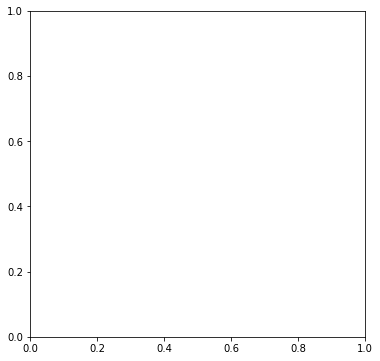

In [317]:
fig, ax = plt.subplots(figsize=(6, 6))

# ZIP codes
mmincome.to_crs(epsg=3857).plot(ax=ax, facecolor="none", edgecolor="black")

# Shootings
rstr_g.plot(ax=ax, color="crimson")
ax.set_axis_off()

AttributeError: 'DataFrame' object has no attribute 'to_crs'

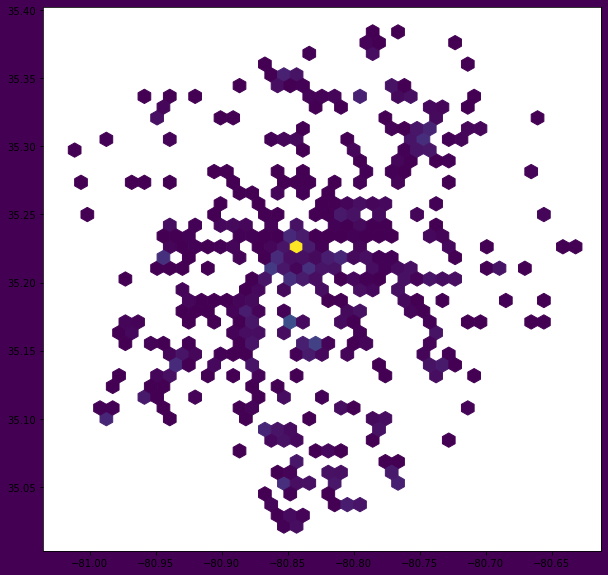

In [314]:
# initialize the axes
fig, ax = plt.subplots(figsize=(10, 10), facecolor=plt.get_cmap('viridis')(0))

# convert to Web Mercator and plot the hexbins 
x = rstr_g.geometry.x
y = rstr_g.geometry.y
ax.hexbin(x, y, gridsize=40, mincnt=1, cmap='viridis')

# overlay the ZIP codes
mmincome.to_crs(epsg=3857).plot(ax=ax, 
                                 facecolor='none', 
                                 linewidth=0.5,
                                 edgecolor='white')

ax.set_axis_off()

In [313]:
rstr_g.to_crs(epsg=3857).plot(ax=ax, 
                                 facecolor='none', 
                                 linewidth=0.5,
                                 edgecolor='white')

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

### 2.6 Comparing polarity vs. stars geographically

- Merge the restaurants GeoDataFrame with the DataFrame with the 'polarity' column for each review. 
- Make a side-by-side plot with two columns: one subplot shows hex bins giving the polarity of the restaurant review and the other shows hex bins giving the number of stars

As we saw in Section 1, you should see strong correlation between the two subplots. 

**Hints**
- The 'business_id' column should be present in both the data frames holding review data and restaurant data.
- See the `plt.subplots()` function for creating a figure with 2 subplots.
